# **0 Imports and Reading Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/kaggle/input/icpc-world-finals-ranking-since-1999/icpc-full.csv')

# **1 Data Understanding**

In [3]:
df.shape

(2308, 21)

In [4]:
df.head(10)

,Year,Date,Host,City,Venue,Rank,University,Country,Team,Contestant 1,...,Contestant 3,Gold,Silver,Bronze,Honorable,Score,Total,Score Percentage,Penalty,Prize
0,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,1.0,University of Waterloo,Canada,U Waterloo,David Kennedy,...,Viet-Trung Luu,True,False,False,False,6.0,8,0.75,948.0,World Champion
1,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,2.0,Albert-Ludwigs-Universität Freiburg,Germany,Freiburg B Team,NaN,...,NaN,False,True,False,False,6.0,8,0.75,992.0,NaN
2,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,3.0,St. Petersburg Institute of Fine Mechanics & O...,Russia,St. Petersburg IFMO,Alexander Volkov,...,Vladimir Lyovkin,False,False,True,False,6.0,8,0.75,1046.0,NaN
3,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,4.0,University of Bucharest,Romania,UNIBUC Bucharest,NaN,...,NaN,False,False,True,False,6.0,8,0.75,1048.0,NaN
4,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,5.0,Duke University,United States,Duke Blue Devils,NaN,...,NaN,False,False,True,False,6.0,8,0.75,1337.0,NaN
5,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,6.0,California Polytechnic State University,United States,Cal Poly Gold,NaN,...,NaN,False,False,True,False,5.0,8,0.62,724.0,NaN
6,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,7.0,University of California at Berkeley,United States,UC Berkeley Blue,NaN,...,NaN,False,False,True,False,5.0,8,0.62,732.0,NaN
7,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,8.0,Harvard University,United States,Harvard,NaN,...,NaN,False,False,True,False,5.0,8,0.62,733.0,NaN
8,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,9.0,St. Petersburg State University,Russia,St. Petersburg State U,Ilya Mironov,...,Vasiliy Filippov,False,False,True,False,5.0,8,0.62,762.0,NaN
9,1999,1999-04-11,Netherlands,Eindhoven,Eindhoven University of Technology,10.0,National Taiwan University,Taiwan,National TU VmanTeam,NaN,...,NaN,False,False,True,False,5.0,8,0.62,847.0,NaN


In [5]:
df.columns

Index(['Year', 'Date', 'Host', 'City', 'Venue', 'Rank', 'University',
       'Country', 'Team', 'Contestant 1', 'Contestant 2', 'Contestant 3',
       'Gold', 'Silver', 'Bronze', 'Honorable', 'Score', 'Total',
       'Score Percentage', 'Penalty', 'Prize'],
      dtype='object')

In [6]:
df.dtypes

Year                  int64
Date                 object
Host                 object
City                 object
Venue                object
Rank                float64
University           object
Country              object
Team                 object
Contestant 1         object
Contestant 2         object
Contestant 3         object
Gold                   bool
Silver                 bool
Bronze                 bool
Honorable              bool
Score               float64
Total                 int64
Score Percentage    float64
Penalty             float64
Prize                object
dtype: object

In [7]:
df.describe()

,Year,Rank,Score,Total,Score Percentage,Penalty
count,2308.000000,2265.000000,2275.000000,2308.000000,2275.000000,2190.000000
mean,2011.681976,53.217219,3.875604,11.132582,0.348523,655.082648
std,6.320118,33.887514,2.225798,1.608310,0.194726,391.896365
min,1999.000000,1.000000,0.000000,8.000000,0.000000,0.000000
25%,2007.000000,25.000000,2.000000,10.000000,0.200000,365.250000
50%,2012.000000,49.000000,4.000000,11.000000,0.330000,638.000000
75%,2017.000000,78.000000,5.000000,12.000000,0.500000,934.500000
max,2021.000000,139.000000,13.000000,15.000000,1.000000,1912.000000


# **2 Data Preparation**

In [8]:
# Dropping irrelevant columns

df = df.drop(['Date', 'City', 'Venue', 'Team', 'Contestant 1',
         'Contestant 2', 'Contestant 3', 'Gold', 'Silver', 
         'Bronze', 'Honorable', 'Penalty', 'Prize'], axis=1)

In [9]:
# Dropping entries with null value(s)

df = df.dropna()

In [10]:
# Fix data type

df = df.astype({'Rank' : 'int', 'Score' : 'int'})

In [11]:
# Format columns name

df = df.rename(columns={'Year' : 'year','Host' : 'host','Rank' : 'rank',
                        'University' : 'university','Country' : 'country',
                        'Score' : 'total_solved','Total' : 'total_problems',
                       'Score Percentage' : 'solved_percentage'})

In [12]:
# Check for duplicated data

df.loc[df.duplicated()]

,year,host,rank,university,country,total_solved,total_problems,solved_percentage


# **3 Feature Relationships**

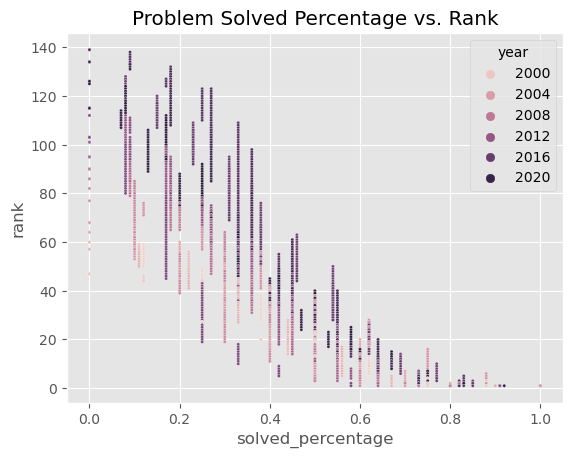

In [13]:
rev_df = df.sort_values(by=['rank'], ascending=False)

ax = sns.scatterplot(x='solved_percentage',
                y='rank',
                hue='year',
                data=rev_df,
                s=5)
ax.set_title('Problem Solved Percentage vs. Rank')
plt.show()